In [112]:
import pandas as pd
import numpy as np

In [113]:
df = pd.read_csv("spam.csv", encoding='ISO-8859–1')

In [114]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5530,ham,I think that tantrum's finished so yeah I'll b...,NaN,NaN,NaN
1238,ham,"Dear relieved of westonzoyland, all going to p...",NaN,NaN,NaN
2264,ham,Ok . . now i am in bus. . If i come soon i wil...,NaN,NaN,NaN
3120,ham,Small problem in auction:)punj now asking tiwary,NaN,NaN,NaN
3672,ham,Moji just informed me that you saved our lives...,NaN,NaN,NaN


In [115]:
df.shape

(5572, 5)

## 1. Data Cleaning 

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [117]:
#drop last three columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [118]:
df.sample(5)

,v1,v2
4082,ham,"Good afternoon, my love. It was good to see yo..."
4906,ham,Then anything special?
4549,ham,\Hey! do u fancy meetin me at 4 at cha åÐ hav ...
5555,ham,Yeh. Indians was nice. Tho it did kane me off ...
2120,ham,"Argh my 3g is spotty, anyway the only thing I ..."


In [119]:
#renaming the cols
df.rename(columns= {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
3341,ham,You will go to walmart. I.ll stay.
2339,ham,Cheers for the message Zogtorius. IåÕve been s...
331,ham,Maybe i could get book out tomo then return it...
2808,ham,Oh yeah I forgot. U can only take 2 out shoppi...
3469,ham,aathi..where are you dear..


In [120]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [121]:
df['target'] = encoder.fit_transform(df['target'])

In [122]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [124]:
#check for duplicate values
df.duplicated().sum()

403

In [125]:
#remove duplicate values
df = df.drop_duplicates(keep = 'first')

In [126]:
df.duplicated().sum()

0

In [127]:
df.shape

(5169, 2)

## 2. EDA 
exploratory data analysis ???

In [128]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

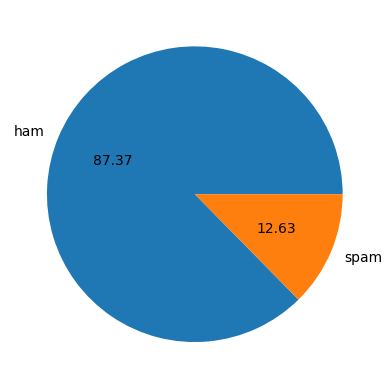

In [129]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [130]:
#data is imbalanced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [131]:
df['num_char'] =df['text'].apply(len)

In [132]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [135]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [134]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
